# StackOverflow Dataset
## Statistical Inference and Hypothesis Testing

In this notebook, we study the Stack Overlfow Survey from Developers in year 2022.

Table of Contents
- <a href='#read-data'>Read Data</a>
- <a href='#determine-the-question'>Determine the Question</a>
- <a href='#clean'>Preprocess the Data</a>


In [1]:
# import packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data <a id='read-data'></a>
First we read the data and check if it is being read without any errors.

In [2]:
## Read Data
df = pd.read_csv("./data/stackoverflow-developer-survey-2022/survey_results_public.csv")

In [3]:
df.shape

(73268, 79)

This shows that the data set has $73268$ rows and $79$ columns. As a result, the dataset contains answers of $73268$ developers about $79$ questions.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

## Determine the Questions <a id="determine-the-question"></a>

There are lot of questions we can ask and use this dataset to answer for this. However, we need to choose a specfic question that we are interested to answer.


One the questions in the survey was the following:
>Which **database environments** have you done extensive development work in over
the past year, and which do you want to work in over the next year? (If you both
worked with the database and want to continue to do so, please check both boxes in
that row.)

And the answers were:
- Cassandra
- Couchbase
- CouchDB
- Cloud Firestore
- DynamoDB
- Elasticsearch
- Worked with in PAST year Want to work with NEXT year
- IBM DB2
- MariaDB
- Microsoft SQL Server
- MongoDB
- MySQL
- Neo4j
- Oracle
- PostgreSQL
- Firebase Realtime Database
- Redis
- SQLite
- Other

We want to analyze answers to this question and use statistical inference to reach conclusions about the whole population of developers.

The columns **'DatabaseHaveWorkedWith'** and **'DatabaseWantToWorkWith'** have the informations related to this question. Thus, for now we create a data frame which has these two columns and in future if wee need we can add other columns to this data frame.

In [5]:
# subset dataframe
df_database = df[['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith']].copy()

## Preprocess the dataset <a id="clean"></a>

Let's see the head of the database:

In [6]:
df_database.head()

,DatabaseHaveWorkedWith,DatabaseWantToWorkWith
0,NaN,NaN
1,NaN,NaN
2,Microsoft SQL Server,Microsoft SQL Server
3,Microsoft SQL Server,Microsoft SQL Server
4,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Cloud Firestore;Elasticsearch;Firebase Realtim...


Since, a developer may have worked with different databases, one column may contain more than one database. Therefore, to analyze the databases wee need to extract all database names from these columns.

However since the developer can choose many of the choice from the survey, or he/she can add other database technologies, wee need to get all possible values in both columns before continue.

In [7]:
list_of_all_raw_answers = []
list_of_all_raw_answers += df_database['DatabaseHaveWorkedWith'].dropna().tolist()
list_of_all_raw_answers += df_database['DatabaseWantToWorkWith'].dropna().tolist()
list_of_all_raw_answers

['Microsoft SQL Server',
 'Microsoft SQL Server',
 'Cloud Firestore;Elasticsearch;Microsoft SQL Server;Firebase Realtime Database',
 'Cloud Firestore;MongoDB;Firebase Realtime Database',
 'MongoDB;MySQL',
 'Microsoft SQL Server',
 'Couchbase;CouchDB;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis',
 'PostgreSQL',
 'DynamoDB;PostgreSQL',
 'Elasticsearch;MongoDB;Neo4j;PostgreSQL',
 'Cloud Firestore;Microsoft SQL Server;MongoDB;MySQL;Firebase Realtime Database;SQLite',
 'Elasticsearch;MySQL',
 'Cassandra;PostgreSQL',
 'Microsoft SQL Server',
 'MySQL',
 'MariaDB',
 'MySQL;Redis;SQLite',
 'Microsoft SQL Server;PostgreSQL;Redis',
 'PostgreSQL;Redis;SQLite',
 'MongoDB;MySQL',
 'Microsoft SQL Server;PostgreSQL',
 'Microsoft SQL Server;MySQL;Redis',
 'Microsoft SQL Server',
 'Microsoft SQL Server;MySQL;PostgreSQL;Redis;SQLite',
 'MySQL',
 'MongoDB;PostgreSQL;SQLite',
 'MariaDB;MongoDB;MySQL;PostgreSQL;SQLite',
 'SQLite',
 'Elasticsearch;MariaDB;PostgreSQL;Redis',
 'MongoDB;MySQL;SQLite',
 '

In [8]:
# split each string on ; and create list of lists
list_of_all_raw_answers = [answer.split(";") for answer in list_of_all_raw_answers]

In [9]:
# flatten the list
import itertools

flat_list = list(itertools.chain(*list_of_all_raw_answers))

In [10]:
from collections import Counter

counted = Counter(flat_list)
database_freq = {k: v for k, v in sorted(counted.items(), key=lambda item: item[1], reverse=True)}
database_freq

{'PostgreSQL': 51750,
 'MySQL': 44791,
 'MongoDB': 34525,
 'SQLite': 33572,
 'Redis': 29682,
 'Microsoft SQL Server': 26222,
 'MariaDB': 18093,
 'Elasticsearch': 15963,
 'Firebase Realtime Database': 10621,
 'Oracle': 10505,
 'DynamoDB': 10338,
 'Cloud Firestore': 8408,
 'Cassandra': 4795,
 'Neo4j': 3645,
 'CouchDB': 1937,
 'Couchbase': 1762,
 'IBM DB2': 1738}

In [35]:
# Now we add two columns for each database choice from above dictionary into the df_database

for database in database_freq.keys():
    # a column for a specific database that a develper have worked with (_H)
    df_database[database+"_H"] = df_database["DatabaseHaveWorkedWith"].str.contains(database).fillna(0)
    # a column for a specific database that a develop want to work with (_W)
    df_database[database+"_W"] = df_database["DatabaseWantToWorkWith"].str.contains(database).fillna(0)
    # a column that shows the difference between developers who want to work with and 
    # who have worked
    df_database[database+"_C"] = df_database[database+"_W"].fillna(0) - df_database[database+"_H"].fillna(0) 

In [36]:
df_database

,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PostgreSQL_H,PostgreSQL_W,PostgreSQL_C,MySQL_H,MySQL_W,MySQL_C,MongoDB_H,MongoDB_W,...,Neo4j_C,CouchDB_H,CouchDB_W,CouchDB_C,Couchbase_H,Couchbase_W,Couchbase_C,IBM DB2_H,IBM DB2_W,IBM DB2_C
0,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Microsoft SQL Server,Microsoft SQL Server,False,False,0,False,False,0,False,False,...,0,False,False,0,False,False,0,False,False,0
3,Microsoft SQL Server,Microsoft SQL Server,False,False,0,False,False,0,False,False,...,0,False,False,0,False,False,0,False,False,0
4,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Cloud Firestore;Elasticsearch;Firebase Realtim...,False,False,0,False,False,0,False,False,...,0,False,False,0,False,False,0,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73263,Elasticsearch;MySQL;PostgreSQL;Redis,MySQL;PostgreSQL;Redis,True,True,0,True,True,0,False,False,...,0,False,False,0,False,False,0,False,False,0
73264,Elasticsearch;MongoDB;Oracle;SQLite,Elasticsearch;Neo4j;SQLite,False,False,0,False,False,0,True,False,...,1,False,False,0,False,False,0,False,False,0
73265,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...,True,True,0,True,True,0,False,False,...,0,False,False,0,False,False,0,False,False,0
73266,Microsoft SQL Server;MongoDB;Oracle,NaN,False,0,0,False,0,0,True,0,...,0,False,0,0,False,0,0,False,0,0


In [102]:
df_database.mean()*100

C:\Users\javad\AppData\Local\Temp\ipykernel_4940\4247157758.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_database.mean()*100


PostgreSQL_H                    36.220451
PostgreSQL_W                    34.410657
PostgreSQL_C                    -1.809794
MySQL_H                         38.925588
MySQL_W                         22.207512
MySQL_C                        -16.718076
MongoDB_H                       23.513676
MongoDB_W                       23.607851
MongoDB_C                        0.094175
SQLite_H                        26.596877
SQLite_W                        19.223945
SQLite_C                        -7.372932
Redis_H                         18.385926
Redis_W                         22.125621
Redis_C                          3.739695
Microsoft SQL Server_H          22.322160
Microsoft SQL Server_W          13.466998
Microsoft SQL Server_C          -8.855162
MariaDB_H                       14.893269
MariaDB_W                        9.801005
MariaDB_C                       -5.092264
Elasticsearch_H                 10.140853
Elasticsearch_W                 11.646285
Elasticsearch_C                  1

We are interested in the **DATABASE_NAME_C** column. The mean of this column determines in average the conversion rate of developers to a database. 

For example mean of **PostgreSQL_C** columns in $-1.8098$. The meaning of this number is that among developers who have participated in the stack overflow survey the average rate of developers who want to use PostgreSQL minus the developers who will stop using the PostgreSQL per all developers is $-1.8$. Since, this number is negative the naive guess might be developers starting abandon PostgreSQL in favor of other databases. However, this is not true because we need to determine confidence interval.

In the next section, we will start to use statistical inference to determine the conversion rate of different databases.

## Estimated Conversion Rate of Databases

We are interested to estimate $\rm{Mean}(\rm{Conversion~Rate})$ of databases.

We write a function to get a database name and calculate the interval estimation of conversion rate of developers for that database.

In [103]:
def estimate_conversion_rate_interval(dataframe, database_name, confidence_level=95, n_bootstrap=1000):
    """Finds the interval estimate of conversion rate.
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        The dataframe which contains a column named `database_name`_{C}.
        
    database_name: str
        The name of the database we are interested to calculate conversion rate
        of developers for it.
        
    confidence_level: float
        The confidence level of interval estimation.
        
    n_bootstrap: int
        Number of bootstrapes.
        
    """
    np.random.seed(123)
    series = dataframe[database_name+"_C"]
    bootstraped_sample_of_means = []
    for _ in range(n_bootstrap):
        bootstraped_sample_of_means.append(
            series.sample(frac=1, replace=True).mean() * 100
        )
    
    alpha = (100 - confidence_level) / 2 * 0.01
    
    lower_bound = np.quantile(bootstraped_sample_of_means, alpha)
    upper_bound = np.quantile(bootstraped_sample_of_means, 1 - alpha)
    poinst_estimate = np.mean(bootstraped_sample_of_means)
    
    return lower_bound, poinst_estimate, upper_bound
    

In [128]:
# find confidence intervals for all databases
data_dict = {}
data_dict['database'] = []
data_dict['lower_bound'] = []
data_dict['upper_bound'] = []
data_dict['point_estimate'] = []

for database in database_freq.keys():
    CL = 95
    data_dict['database'].append(database)
    lower_bound, point_estimate, upper_bound = estimate_conversion_rate_interval(df_database, database, CL)
    data_dict['point_estimate'].append(point_estimate)
    data_dict['lower_bound'].append(lower_bound)
    data_dict['upper_bound'].append(upper_bound)
    print(f"{str(database).ljust(35)}: point estimate = {point_estimate:0.1f}, 95%CL intervale estimate = [{lower_bound:0.1f}, {upper_bound:0.1f}]")
    
cl_dataset = pd.DataFrame(data_dict)

PostgreSQL                         : point estimate = -1.8, 95%CL intervale estimate = [-2.1, -1.5]
MySQL                              : point estimate = -16.7, 95%CL intervale estimate = [-17.0, -16.4]
MongoDB                            : point estimate = 0.1, 95%CL intervale estimate = [-0.2, 0.4]
SQLite                             : point estimate = -7.4, 95%CL intervale estimate = [-7.6, -7.1]
Redis                              : point estimate = 3.7, 95%CL intervale estimate = [3.5, 4.0]
Microsoft SQL Server               : point estimate = -8.9, 95%CL intervale estimate = [-9.1, -8.6]
MariaDB                            : point estimate = -5.1, 95%CL intervale estimate = [-5.3, -4.9]
Elasticsearch                      : point estimate = 1.5, 95%CL intervale estimate = [1.3, 1.7]
Firebase Realtime Database         : point estimate = 0.0, 95%CL intervale estimate = [-0.2, 0.2]
Oracle                             : point estimate = -4.8, 95%CL intervale estimate = [-5.0, -4.6]
DynamoD

In [129]:
cl_dataset.sort_values('point_estimate', inplace=True)

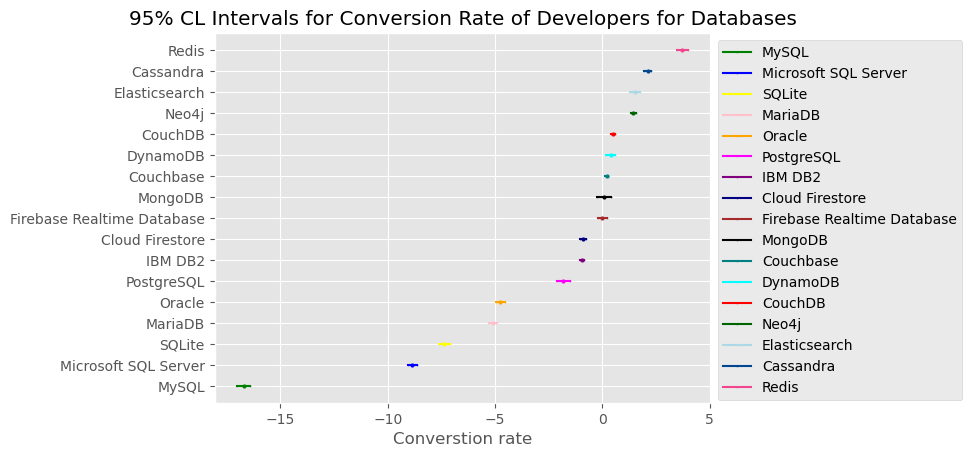

In [130]:
plt.style.use('ggplot')
colors = [
    'green',
    'blue',
    'yellow',
    'pink',
    'orange',
    'magenta',
    'purple',
    'navy',
    'brown',
    'black',
    'teal',
    'cyan',
    'red',
    'darkgreen',
    'lightblue',
    '#00478F',
    '#F0478F',
]
for lower_bound, upper_bound, point_estimate, database, y in zip(
    cl_dataset['lower_bound'],
    cl_dataset['upper_bound'],
    cl_dataset['point_estimate'],
    cl_dataset['database'],
    range(len(cl_dataset))
):
    _ = plt.plot((lower_bound, upper_bound),(y,y),'o-', label=database, markersize=0.2, color=colors[y%len(colors)])
    _ = plt.plot((point_estimate),(y),'o', markersize=2, color=colors[y%len(colors)])
    _ = plt.legend(bbox_to_anchor=(1, 1))
#     _ = plt.xscale('log')
    _ = plt.title("95% CL Intervals for Conversion Rate of Developers for Databases")
    _ = plt.xlabel("Converstion rate")
_ = plt.yticks(range(len(cl_dataset)),list(cl_dataset['database']))
plt.show()

We can say with $95\%$ CL that the number of developers whom want to start using **MySQL** is <strong style="color:red">$[16.4\% ,  17\%]$</strong> less than number of developers whom once used **MySQL** database and are no longer using this database. Roughly, this means that the number of developers whom abandoned **MySQL** is higher than number of developers whom want to use **MySQL** which indicates the decrease of interest to **MySQL**.